<a href="https://colab.research.google.com/github/svhenrique/house-prices-predictor/blob/main/HousePricesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotécas necessárias

In [1]:
# montando drive (para o colab)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# importando bibliotecas necessárias
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


## Lendo dados

In [82]:
# dados em pasta 
pasta = '/content/drive/My Drive/datasets/house-prices/'

In [83]:
# lendo dados de treino e teste
train_data = pd.read_csv(pasta + 'train.csv')
test_data = pd.read_csv(pasta + 'test.csv')

## Limpeza e organização dos dados



In [84]:
# mostrando shape resultante
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


### Limpando dados

In [85]:
# removendo dados nan de train_data
train_data.dropna(how='any',axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [86]:
# removendo dados nan de test_data
test_data.dropna(how='any',axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


É possível observar que todas as linhas foram apagadas, isso indica que existem valores "nan" em todas as instâncias. Entretanto, isso é uma confusão que o pandas fez ao ler o atributo "NA" de "Alley", que significa "No alley access".

In [87]:
# observando as features com maiores ocorrências de nan 
train_data.isnull().sum()[train_data.isnull().sum() > len(train_data)/2]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Logo, essas 4 features podem ter valores normais que são lidos como nan.

Eu irei seguir o glossário de valores para identificar atributos como "NA" que realmente significam algo, evitando perca de dados.

In [88]:
# Existem valores NA, que são confundidos com nans, sobre nas colunas a seguir
print(train_data['Alley'].unique())
print(train_data['PoolQC'].unique())
print(train_data['Fence'].unique())
print(train_data['MiscFeature'].unique())
print(train_data['BsmtQual'].unique())
print(train_data['BsmtCond'].unique())
print(train_data['BsmtExposure'].unique())
print(train_data['BsmtFinType1'].unique())
print(train_data['BsmtFinType2'].unique())
print(train_data['FireplaceQu'].unique())
print(train_data['GarageType'].unique())
print(train_data['GarageFinish'].unique())
print(train_data['GarageQual'].unique())
print(train_data['GarageCond'].unique())

[nan 'Grvl' 'Pave']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [89]:
# inserindo o valor "NA" (No alley access) para os nan em Alley de treino e teste
train_data['Alley'] = train_data['Alley'].fillna('NA')
test_data['Alley'] = test_data['Alley'].fillna('NA')

In [90]:
# inserindo o valor "NA" (No Pool) para os nan em Alley de treino e teste
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
test_data['PoolQC'] = test_data['PoolQC'].fillna('NA')

In [91]:
# inserindo o valor "NA" (No Fencel) para os nan em PoolQC de treino e teste
train_data['Fence'] = train_data['Fence'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')

In [92]:
# inserindo o valor "NA" (None) para os nan em PoolQC de treino e teste
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('NA')

In [93]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtQual de treino e teste
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')

In [94]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtCond de treino e teste
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')

In [95]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtExposure de treino e teste
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')

In [96]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtFinType1 de treino e teste
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')

In [97]:
# inserindo o valor "NA" (No Basement) para os nan em BsmtFinType2 de treino e teste
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')

In [98]:
# inserindo o valor "NA" (No Fireplace) para os nan em FireplaceQu de treino e teste
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')

In [99]:
# inserindo o valor "NA" (No Garage) para os nan em GarageType de treino e teste
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')

In [100]:
# inserindo o valor "NA" (No Garage) para os nan em GarageFinish de treino e teste
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')

In [101]:
# inserindo o valor "NA" (No Garage) para os nan em GarageQual de treino e teste
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')

In [102]:
# inserindo o valor "NA" (No Garage) para os nan em GarageCond de treino e teste
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')

In [103]:
# removendo os dados nan verdadeiros dos datasets
train_data = train_data.dropna(how='any',axis=0)
test_data = test_data.dropna(how='any',axis=0)

In [104]:
# mostrando shape resultante
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Train data shape:  (1120, 81)
Test data shape:  (1139, 80)


In [105]:
# removendo coluna id (pois ela é inútil para a criação do modelo) 
train_data.drop('Id', inplace=True, axis=1)
test_data.drop('Id', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Organizando dados

In [106]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [107]:
column = 'MSZoning'
print(list(train_data[column].unique()))
print(list(test_data[column].unique()))

['RL', 'RM', 'C (all)', 'FV', 'RH']
['RH', 'RL', 'RM', 'FV', 'C (all)']


In [108]:
categorical_columns = []

# transformando dados categóricos em dados numéricos

columns = list(train_data.columns)
columns.remove('SalePrice')

for column in columns:

  
  data1 = train_data[column].unique()
  data2 = list(test_data[column].unique())

  # pegando valores diferentes dos dois datasets e juntando
  for data in data2:
    if data not in data1:
      data1 = np.append(data1, data)

  if data1.dtype not in [np.int64, np.float64]:

    # separando colunas categóricas 
    categorical_columns.append(column)

    simbols = list(range(data1.shape[0]))
    print()
    print(column)
    print(data1)
    print(simbols)
    print()

    train_data[column].replace(list(data1), simbols, inplace=True)
    test_data[column].replace(list(data1), simbols, inplace=True)


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
[0, 1, 2, 3, 4]


Street
['Pave' 'Grvl']
[0, 1]


Alley
['NA' 'Grvl' 'Pave']
[0, 1, 2]


LotShape
['Reg' 'IR1' 'IR2' 'IR3']
[0, 1, 2, 3]


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
[0, 1, 2, 3]


Utilities
['AllPub']
[0]


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
[0, 1, 2, 3, 4]


LandSlope
['Gtl' 'Mod' 'Sev']
[0, 1, 2]


Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


Condition1
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
[0, 1, 2, 3, 4, 5]


BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
[0, 1, 2, 3, 4]


HouseStyle
['2St

## Seleção de Features

In [131]:
# Separando em dados de treino e dados de teste para a seleção
# Utilizrei apenas os dados categóricos
X = train_data.drop(columns=['SalePrice'])
X = X[categorical_columns]
y = train_data['SalePrice']

In [132]:
# preparando teste QuiQuadrado para selecionar as 15 melhores features
qui_test = SelectKBest(score_func=chi2, k=15)

In [133]:
# selecionando os 15 melhores resultados
selecionados = qui_test.fit_transform(X, y)

In [134]:
# coletando colunas
columns = qui_test.get_support(indices=True)
features_selecionadas = X.iloc[:,columns]

In [135]:
# Mostrando dataframe com colunas categóricas selecionadas
features_selecionadas.head()

,MSZoning,LandContour,Neighborhood,Condition1,Condition2,BldgType,RoofMatl,Exterior1st,Exterior2nd,BsmtCond,BsmtExposure,BsmtFinType2,Functional,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,0,0,2,0,0,0,0,2,2,1,0,0,0,0,1
4,0,0,3,0,0,0,0,0,0,0,3,0,0,0,0


## Criando novo database com features selecionadas

In [71]:
# mostrando shape de dataset antes da remoção
train_data.shape

(1120, 80)

In [78]:
# removendo colunas categóricas que não serão usadas
train_data.drop(columns=(set(categorical_columns) - set(features_selecionadas.columns)), inplace=True)
test_data.drop(columns=(set(categorical_columns) - set(features_selecionadas.columns)),  inplace=True)

In [79]:
# mostrando shape depois da remoção
train_data.shape

(1120, 48)

## Análise preliminar dos dados

In [ ]:
sns.set()
sns.pairplot(train_data, size = 2.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb57216a560> (for post_execute):


KeyboardInterrupt: ignored

### Análise preliminar dos dados


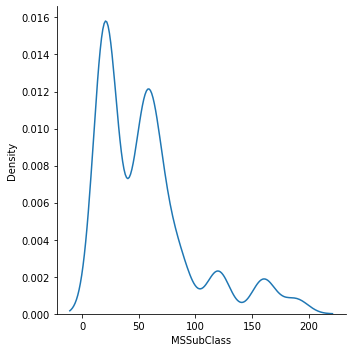

In [ ]:
# distribuição de probabilidade de MSSubClass
sns.displot(data=train_data, x='MSSubClass', kind="kde")
plt.show()

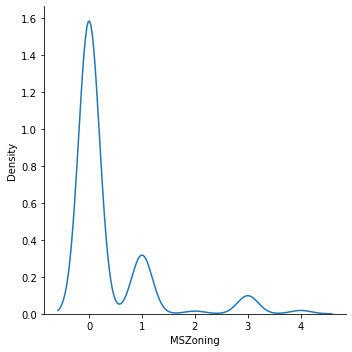

In [ ]:
# distribuição de probabilidade de MSZoning
sns.displot(data=train_data, x='MSZoning', kind="kde")
plt.show()

In [ ]:
# Instâncias de Street

zero = test_data[test_data['Street']==0]['Street']
one = test_data[test_data['Street']==1]['Street']

print('Paved: ', one.count())
print('Gravel: ', zero.count())

Paved:  3
Gravel:  1136


In [ ]:
# Instâncias de Alley

zero = test_data[test_data['Alley']==0]['Alley']
one = test_data[test_data['Alley']==1]['Alley']
two = test_data[test_data['Alley']==2]['Alley']

print('NA: ', one.count())
print('Grvl: ', zero.count())
print('Pave: ', two.count())

NA:  54
Grvl:  1055
Pave:  30


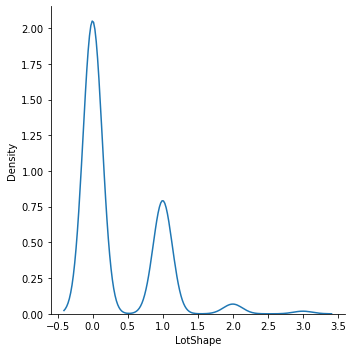

In [ ]:
# distribuição de probabilidade de LotShape
sns.displot(data=train_data, x='LotShape', kind="kde")
plt.show()

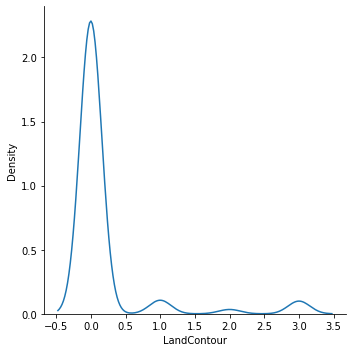

In [ ]:
# distribuição de probabilidade de LandContour
sns.displot(data=train_data, x='LandContour', kind="kde")
plt.show()

In [ ]:
# Instâncias de Utilities 
print('Instâncias: ', train_data['Utilities'].unique())

Instâncias:  [0]


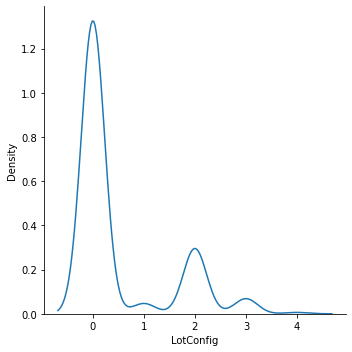

In [ ]:
# distribuição de probabilidade de LotConfig
sns.displot(data=train_data, x='LotConfig', kind="kde")
plt.show()

In [ ]:
# Instâncias de LandSlope

zero = test_data[test_data['LandSlope']==0]['LandSlope']
one = test_data[test_data['LandSlope']==1]['LandSlope']
two = test_data[test_data['LandSlope']==2]['LandSlope']

print('Gtl: ', one.count())
print('Mod: ', zero.count())
print('Sev: ', two.count())

Gtl:  51
Mod:  1087
Sev:  1


In [ ]:
train_data['Neighborhood'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

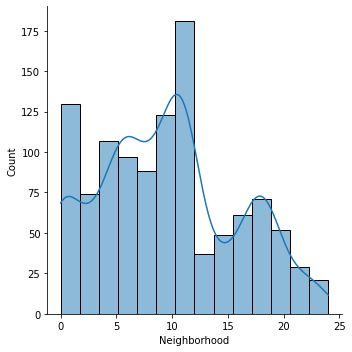

In [ ]:
# gráfico de barras de Neighborhood
sns.displot(data=train_data, x='Neighborhood', kde=True)
plt.show()

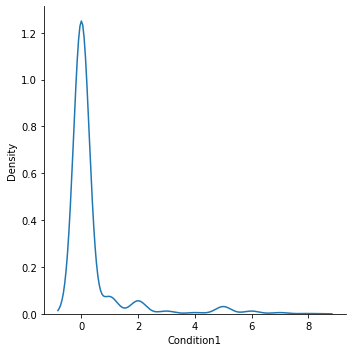

In [ ]:
# gráfico de barras de Condition1
sns.displot(data=train_data, x='Condition1', kind="kde")
plt.show()

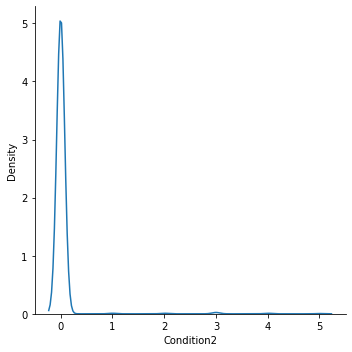

In [ ]:
# gráfico de barras de Condition2
sns.displot(data=train_data, x='Condition2', kind="kde")
plt.show()

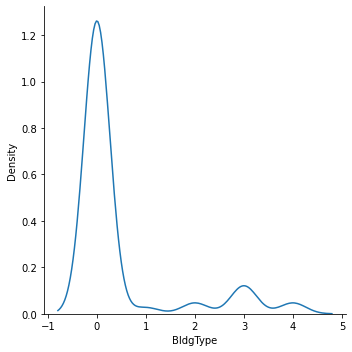

In [ ]:
# gráfico de barras de BldgType
sns.displot(data=train_data, x='BldgType', kind="kde")
plt.show()

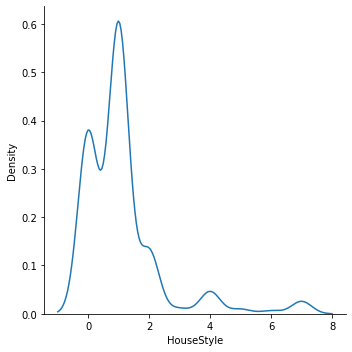

In [ ]:
# gráfico de barras de HouseStyle
sns.displot(data=train_data, x='HouseStyle', kind="kde")
plt.show()

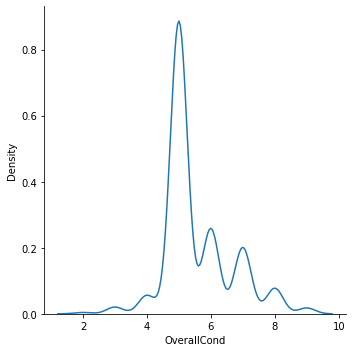

In [ ]:
# gráfico de barras de OverallCond
sns.displot(data=train_data, x='OverallCond', kind="kde")
plt.show()